# Imports 

In [2]:
%load_ext autoreload
%autoreload 2

%matplotlib inline

In [3]:
from fastai.imports import *
from fastai.structured import *

from pandas_summary import DataFrameSummary
from sklearn.ensemble import RandomForestRegressor, RandomForestClassifier
from IPython.display import display

from sklearn import metrics

In [4]:
PATH = "data/bluebook-for-bulldozers/"

In [5]:
!ls {PATH}

'Data Dictionary.xlsx'		    Train.7z	        Train.zip
 Machine_Appendix.csv		    TrainAndValid.7z    Valid.7z
 median_benchmark.csv		    TrainAndValid.csv   Valid.csv
 random_forest_benchmark_test.csv   TrainAndValid.zip   ValidSolution.csv
 Test.csv			    Train.csv	        Valid.zip


# Dataset

## Reading dataset

In [6]:
# read dataset from csv file and convert it to panda frame
df_raw = pd.read_csv(f'{PATH}Train.csv', low_memory=False, 
                     parse_dates=["saledate"]) # configure the coulms that contains dates

In [6]:
# function that prevent the skiping in printing
def display_all(df):
    with pd.option_context("display.max_rows", 1000, "display.max_columns", 1000): 
        display(df)

In [7]:
# print the last 5 samples
display_all(df_raw.tail().T)

,401120,401121,401122,401123,401124
SalesID,6333336,6333337,6333338,6333341,6333342
SalePrice,10500,11000,11500,9000,7750
MachineID,1840702,1830472,1887659,1903570,1926965
ModelID,21439,21439,21439,21435,21435
datasource,149,149,149,149,149
auctioneerID,1,1,1,2,2
YearMade,2005,2005,2005,2005,2005
MachineHoursCurrentMeter,NaN,NaN,NaN,NaN,NaN
UsageBand,NaN,NaN,NaN,NaN,NaN
saledate,2011-11-02 00:00:00,2011-11-02 00:00:00,2011-11-02 00:00:00,2011-10-25 00:00:00,2011-10-25 00:00:00


In [8]:
# display information about every feature in the dataset
display_all(df_raw.describe(include='all').T)

,count,unique,top,freq,first,last,mean,std,min,25%,50%,75%,max
SalesID,401125,NaN,NaN,NaN,NaN,NaN,1.91971e+06,909021,1.13925e+06,1.41837e+06,1.63942e+06,2.24271e+06,6.33334e+06
SalePrice,401125,NaN,NaN,NaN,NaN,NaN,31099.7,23036.9,4750,14500,24000,40000,142000
MachineID,401125,NaN,NaN,NaN,NaN,NaN,1.2179e+06,440992,0,1.0887e+06,1.27949e+06,1.46807e+06,2.48633e+06
ModelID,401125,NaN,NaN,NaN,NaN,NaN,6889.7,6221.78,28,3259,4604,8724,37198
datasource,401125,NaN,NaN,NaN,NaN,NaN,134.666,8.96224,121,132,132,136,172
auctioneerID,380989,NaN,NaN,NaN,NaN,NaN,6.55604,16.9768,0,1,2,4,99
YearMade,401125,NaN,NaN,NaN,NaN,NaN,1899.16,291.797,1000,1985,1995,2000,2013
MachineHoursCurrentMeter,142765,NaN,NaN,NaN,NaN,NaN,3457.96,27590.3,0,0,0,3025,2.4833e+06
UsageBand,69639,3,Medium,33985,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
saledate,401125,3919,2009-02-16 00:00:00,1932,1989-01-17 00:00:00,2011-12-30 00:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [17]:
print(f'the number of the sampels in the dataset is :{len(df_raw)}')
print(f'the number of the features in the dataset is :{len(df_raw.columns)}')

the number of the sampels in the dataset is :401125
the number of the features in the dataset is :65


In [7]:
# get the dependant variable (we want to predict), log to have mse for the log
df_raw.SalePrice = np.log(df_raw.SalePrice)

## handling date features

In [8]:
# convert date coulmn to information about data (ex: data, week, month, season, ...)
add_datepart(df_raw, 'saledate')
df_raw.saleYear.head()

0    2006
1    2004
2    2004
3    2011
4    2009
Name: saleYear, dtype: int64

In [15]:
#?? add_datepart
df_raw.columns

Index(['SalesID', 'SalePrice', 'MachineID', 'ModelID', 'datasource',
       'auctioneerID', 'YearMade', 'MachineHoursCurrentMeter', 'UsageBand',
       'fiModelDesc', 'fiBaseModel', 'fiSecondaryDesc', 'fiModelSeries',
       'fiModelDescriptor', 'ProductSize', 'fiProductClassDesc', 'state',
       'ProductGroup', 'ProductGroupDesc', 'Drive_System', 'Enclosure',
       'Forks', 'Pad_Type', 'Ride_Control', 'Stick', 'Transmission',
       'Turbocharged', 'Blade_Extension', 'Blade_Width', 'Enclosure_Type',
       'Engine_Horsepower', 'Hydraulics', 'Pushblock', 'Ripper', 'Scarifier',
       'Tip_Control', 'Tire_Size', 'Coupler', 'Coupler_System',
       'Grouser_Tracks', 'Hydraulics_Flow', 'Track_Type',
       'Undercarriage_Pad_Width', 'Stick_Length', 'Thumb', 'Pattern_Changer',
       'Grouser_Type', 'Backhoe_Mounting', 'Blade_Type', 'Travel_Controls',
       'Differential_Type', 'Steering_Controls', 'saleYear', 'saleMonth',
       'saleWeek', 'saleDay', 'saleDayofweek', 'saleDayofyear',


## handling cateroies (string) features

In [9]:
# convert categoreis data to numbers
train_cats(df_raw)

In [19]:
?? train_cats

In [10]:
# categoreis for UsageBand features 
df_raw.UsageBand.cat.categories

Index(['High', 'Low', 'Medium'], dtype='object')

In [11]:
# order the categoreis in the right order
df_raw.UsageBand.cat.set_categories(['High', 'Medium', 'Low'], ordered=True, inplace=True)

## handling Null values

In [22]:
# presentage of null variables for each feature
display_all(df_raw.isnull().sum().sort_index()/len(df_raw))

Backhoe_Mounting            0.803872
Blade_Extension             0.937129
Blade_Type                  0.800977
Blade_Width                 0.937129
Coupler                     0.466620
Coupler_System              0.891660
Differential_Type           0.826959
Drive_System                0.739829
Enclosure                   0.000810
Enclosure_Type              0.937129
Engine_Horsepower           0.937129
Forks                       0.521154
Grouser_Tracks              0.891899
Grouser_Type                0.752813
Hydraulics                  0.200823
Hydraulics_Flow             0.891899
MachineHoursCurrentMeter    0.644089
MachineID                   0.000000
ModelID                     0.000000
Pad_Type                    0.802720
Pattern_Changer             0.752651
ProductGroup                0.000000
ProductGroupDesc            0.000000
ProductSize                 0.525460
Pushblock                   0.937129
Ride_Control                0.629527
Ripper                      0.740388
S

In [13]:
df, y, nas = proc_df(df_raw, 'SalePrice')

In [25]:
#?? proc_df
display_all(df.tail().T)

,401120,401121,401122,401123,401124
SalesID,6333336,6333337,6333338,6333341,6333342
MachineID,1840702,1830472,1887659,1903570,1926965
ModelID,21439,21439,21439,21435,21435
datasource,149,149,149,149,149
auctioneerID,1,1,1,2,2
YearMade,2005,2005,2005,2005,2005
MachineHoursCurrentMeter,0,0,0,0,0
UsageBand,0,0,0,0,0
fiModelDesc,657,657,657,483,483
fiBaseModel,207,207,207,159,159


# Random Forest
Random forest is a brute force algorithm. it's works by tring every possiple features and every possiple values in the data set and choose a split in the data that will geanrate the leatest error, and this is continues until the split generate one sample at each leaf.
<img src="images/rf.png">

## split dataset

In [14]:
def split_vals(a,n): return a[:n].copy(), a[n:].copy()

n_valid = 12000  # same as Kaggle's test set size
n_trn = len(df)-n_valid
raw_train, raw_valid = split_vals(df_raw, n_trn)
X_train, X_valid = split_vals(df, n_trn)
y_train, y_valid = split_vals(y, n_trn)

X_train.shape, y_train.shape, X_valid.shape

((389125, 66), (389125,), (12000, 66))

## used metrics 

In [15]:
# compute mse and R^2 score 
def rmse(x,y): return math.sqrt(((x-y)**2).mean())

def print_score(m):
    res = [rmse(m.predict(X_train), y_train), rmse(m.predict(X_valid), y_valid),
                m.score(X_train, y_train), m.score(X_valid, y_valid)]
    if hasattr(m, 'oob_score_'): res.append(m.oob_score_)
    print(res)

In [28]:
m = RandomForestRegressor(n_jobs=-1)
%time m.fit(X_train, y_train)
print_score(m)

/home/omar/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


CPU times: user 1min 36s, sys: 418 ms, total: 1min 37s
Wall time: 11.5 s
[0.09034157815894134, 0.2497366578576803, 0.9829427045528991, 0.8886186276027016]


## Number of trees

In [ ]:
# take only smaple from dataset to speed process (20,000 sample)
set_rf_samples(20000)

In [32]:
m = RandomForestRegressor(n_jobs=-1)
m.fit(X_train, y_train)
print_score(m)

/home/omar/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


[0.24008167476736048, 0.27506772147400876, 0.8795372287063763, 0.8648776362397075]


In [33]:
preds = np.stack([t.predict(X_valid) for t in m.estimators_])
preds[:,0], np.mean(preds[:,0]), y_valid[0]

(array([8.99962, 9.3501 , 9.15905, 9.01797, 9.68034, 9.21034, 9.3501 , 9.10498, 9.30565, 9.85219]),
 9.30303485657261,
 9.104979856318357)

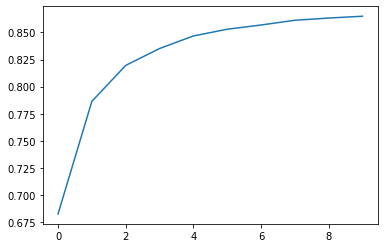

In [34]:
# show the effect of aading new trees
plt.plot([metrics.r2_score(y_valid, np.mean(preds[:i+1], axis=0)) for i in range(10)]);

In [35]:
m = RandomForestRegressor(n_estimators=20, n_jobs=-1)
m.fit(X_train, y_train)
print_score(m)

[0.23132265069882435, 0.267502935676353, 0.8881666984221841, 0.872207584550012]


In [36]:
m = RandomForestRegressor(n_estimators=40, n_jobs=-1)
m.fit(X_train, y_train)
print_score(m)

[0.2264863763954963, 0.26018974751823093, 0.8927940244863344, 0.8790994341891044]


In [37]:
m = RandomForestRegressor(n_estimators=80, n_jobs=-1)
m.fit(X_train, y_train)
print_score(m)

[0.2249301710308315, 0.25995063364456295, 0.8942622041663278, 0.8793215468529323]


after seeing the effect of adding new trees and trying diffrant number of trees the model stops improving after adding more than 40 trees in the random forest

## Handling overfitting 

In [43]:
# use all dataset to show the overfit
reset_rf_samples()

In [44]:
m = RandomForestRegressor(n_estimators=40, n_jobs=-1, oob_score=True)
m.fit(X_train, y_train)
print_score(m)

[0.07845188879957475, 0.23933766367454012, 0.9871370188191969, 0.8977013108850308, 0.908434345137714]


### min_samples_leaf
In the defult random forest the tree continue spliting until the leafs of the tree have only one sample. Using min_samples_leaf make us specify the number of samples in the leafs which helps the model to generalize better.
This has two benefits:

    - There are less decision rules for each leaf node; simpler models should generalize better
    - The predictions are made by averaging more rows in the leaf node, resulting in less volatility


In [45]:
# the number of the samples in the last leaf is 5
m = RandomForestRegressor(n_estimators=40, min_samples_leaf=5, n_jobs=-1, oob_score=True)
m.fit(X_train, y_train)
print_score(m)

[0.1406545260578911, 0.2345299094507261, 0.9586531670471651, 0.9017699317590607, 0.9070752687716693]


### max_features
in addition of using random samples to train rach tree, we can also use radom of features in each split while training the tree. This will inroducy some randmness to the training and will make the trees learn variation of relationships between diffrant features

In [47]:
m = RandomForestRegressor(n_estimators=40, min_samples_leaf=5, max_features=0.5, n_jobs=-1, oob_score=True)
m.fit(X_train, y_train)
print_score(m)

[0.1446813924035442, 0.22924292726767476, 0.9562518003353255, 0.9061487924539131, 0.910127780018597]


In [17]:
m = RandomForestRegressor(n_estimators=40, min_samples_leaf=5, max_features='sqrt', n_jobs=-1, oob_score=True)
m.fit(X_train, y_train)
print_score(m)

[0.18447889150692082, 0.26606170307915045, 0.9288740325236805, 0.8735808961544576, 0.8890532093525528]


## Feature Importance
this method is very important, it first trains the model with all the features and then computes the presiction and mse error for the model, and then we pick a feature randomly shuffel it (which make it not relvant to the prediction) then computes the new predictions, and the drop in the score happed from shuffling this feature considered as the importance of this feature.

In [18]:
fi = rf_feat_importance(m, df)
fi[:20]

,cols,imp
5,YearMade,0.117347
13,ProductSize,0.068887
2,ModelID,0.066799
37,Coupler_System,0.066134
10,fiSecondaryDesc,0.063202
14,fiProductClassDesc,0.053243
8,fiModelDesc,0.047125
19,Enclosure,0.042066
12,fiModelDescriptor,0.038063
9,fiBaseModel,0.036725


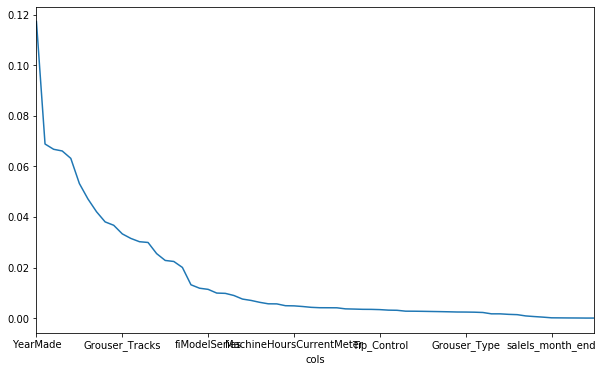

In [22]:
fi.plot('cols', 'imp', figsize=(10,6), legend=False);

In [23]:
def plot_fi(fi): return fi.plot('cols', 'imp', 'barh', figsize=(12,7), legend=False)

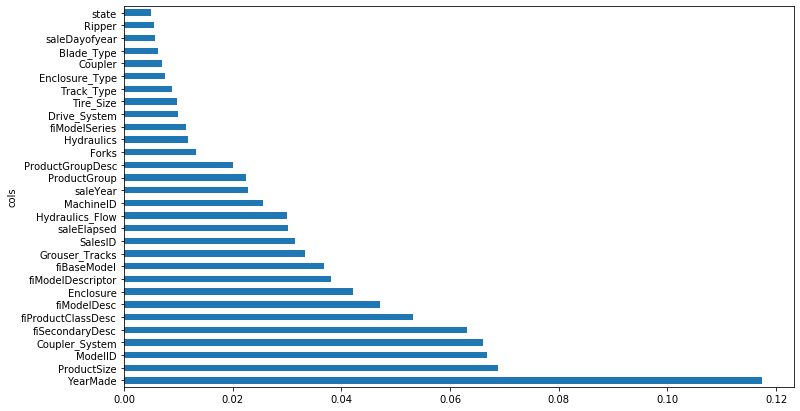

In [24]:
plot_fi(fi[:30]);

In [25]:
# keep features with importance more than .005
to_keep = fi[fi.imp>0.005].cols; len(to_keep)

29

In [61]:
df_keep = df[to_keep].copy()
X_train, X_valid = split_vals(df_keep, n_trn)

KeyError: "['ProductGroup', 'Grouser_Tracks', 'ProductGroupDesc', 'Coupler', 'Enclosure_Type', 'Drive_System', 'Coupler_System', 'Enclosure', 'Blade_Type', 'ProductSize', 'Hydraulics_Flow', 'Ripper', 'Forks', 'Track_Type'] not in index"

In [27]:
m = RandomForestRegressor(n_estimators=40, min_samples_leaf=5, max_features=0.5,
                          n_jobs=-1, oob_score=True)
m.fit(X_train, y_train)
print_score(m)

[0.15409323764319394, 0.22909209924970192, 0.9503748324056907, 0.9062722486938966, 0.9081465061900621]


In [66]:
# prediction
pred = m.predict(X_train)
for out in zip(pred[:30], y_valid[:30]):
    print(out)

(10.169389470451279, 9.104979856318357)
(10.84222239164228, 9.047821442478408)
(9.415517807661672, 9.104979856318357)
(9.61487278334971, 9.259130536145614)
(9.247304213909956, 9.104979856318357)
(9.981994740614027, 9.104979856318357)
(10.61626638736925, 9.615805480084347)
(9.911854204183328, 9.433483923290392)
(10.142017443904479, 9.903487552536127)
(9.854967419305467, 9.581903928408666)
(9.99656428713206, 9.210340371976184)
(10.329377411515452, 8.922658299524402)
(10.441960000942345, 9.615805480084347)
(9.93538740324584, 9.305650551780507)
(9.975223683097283, 10.126631103850338)
(9.824367378721945, 9.95227771670556)
(9.919731379508448, 10.308952660644293)
(10.623350223017042, 10.126631103850338)
(10.122721938416362, 10.275051108968611)
(10.109624810662353, 9.104979856318357)
(10.121920590376249, 9.615805480084347)
(10.041463582216238, 9.159047077588632)
(9.84711951315694, 10.768484990022733)
(10.634966563171474, 9.210340371976184)
(10.13916513305594, 10.46310334047155)
(9.546653814570

# Linear Regression 
This algorithm try to find the equation of the line that represent data and achives the lowest prediction error
<img src='images/lr.png'>

In [30]:
from sklearn.linear_model import LinearRegression

Try with all the model features

In [38]:
df_raw['age'] = df_raw.saleYear-df_raw.YearMade

In [39]:
# handling cateories data by appling one hot encoding
df, y, nas, mapper = proc_df(df_raw, 'SalePrice', max_n_cat=10, do_scale=True)

In [40]:
n_valid = 12000
n_trn = len(df)-n_valid
y_train, y_valid = split_vals(y, n_trn)
raw_train, raw_valid = split_vals(df_raw, n_trn)

In [41]:
df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
SalesID,401125.0,3.147483e-15,1.000001,-0.858580,-0.551518,-0.308344,0.355322,4.855369
MachineID,401125.0,2.895953e-15,1.000001,-2.761738,-0.292989,0.139657,0.567277,2.876309
ModelID,401125.0,-1.300773e-13,1.000001,-1.102854,-0.583548,-0.367372,0.294819,4.871330
datasource,401125.0,-6.855920e-13,1.000001,-1.524823,-0.297450,-0.297450,0.148868,4.165727
auctioneerID,401125.0,-1.064768e-13,1.000001,-0.381738,-0.321407,-0.261075,-0.140412,5.591096
YearMade,401125.0,6.797770e-16,1.000001,-3.081446,0.294188,0.328458,0.345593,0.390145
MachineHoursCurrentMeter,401125.0,8.635210e-14,1.000001,-0.074396,-0.074396,-0.074396,-0.074396,150.038499
fiModelDesc,401125.0,1.673709e+03,1263.331163,1.000000,631.000000,1395.000000,2292.000000,4999.000000
fiBaseModel,401125.0,5.591654e+02,469.310266,1.000000,206.000000,406.000000,704.000000,1950.000000
fiSecondaryDesc,401125.0,3.668504e+01,38.228243,0.000000,0.000000,29.000000,57.000000,175.000000


In [42]:
X_train, X_valid = split_vals(df, n_trn)

In [45]:
m = LinearRegression().fit(X_train, y_train)
print_score(m)

[0.43216580017245837, 0.6197833720295672, 0.609666687353222, 0.31399415665395924]


 Try with the most important features 

In [62]:
df, y, nas = proc_df(df_raw, 'SalePrice')

In [63]:
# keep features with importance more than .005
to_keep = fi[fi.imp>0.005].cols; len(to_keep)

29

In [64]:
df_keep = df[to_keep].copy()
X_train, X_valid = split_vals(df_keep, n_trn)

In [65]:
m = LinearRegression().fit(X_train, y_train)
print_score(m)

[0.5214974379433156, 0.5432613381843345, 0.4316194808774372, 0.4729333076362264]
